In [78]:
# Initialization Cell
path_data = 'C:\\Users\\under\\Datasets\\Neural-Machine-Translation\\Europarl_fr-en'

In [43]:
from models import MyTranslationDataset as mtd
from torchtext.datasets import TranslationDataset
from torchtext.data import Field
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
import spacy

spacy_en = spacy.load('en_core_web_sm')
spacy_fr = spacy.load('fr_core_news_sm')

def tokenize_fr(text):
    return [tok.text for tok in spacy_fr.tokenizer(text)]

def tokenize_en(text):
    return [tok.text for tok in spacy_en.tokenizer(text)]

In [80]:
SRC = Field(tokenize = tokenize_fr, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True)

TRG = Field(tokenize = tokenize_en, 
            init_token = '<sos>', 
            eos_token = '<eos>', 
            lower = True)

train, val, test = TranslationDataset.splits(exts=('.fr','.en'),
                                             fields=(SRC,TRG),
                                             path=path_data)

SRC.build_vocab(train, min_freq = 10)
TRG.build_vocab(train, min_freq = 10)

In [81]:
print(f'Train has {len(train)} sentences, and Test and Val have {len(val)+len(test)} sentences')
print(f'English vocab size: {len(SRC.vocab)}, French vocab size: {len(TRG.vocab)}')

Train has 1401928 sentences, and Test and Val have 600828 sentences
English vocab size: 35837, French vocab size: 26323


In [82]:
# Combine val and test
dev = val+test
print(test[0].trg, '\n', val[0].trg)

['they', 'will', 'see', 'that', 'here', 'was', 'a', 'directive', 'born', 'and', 'bred', 'in', 'the', 'early', '1990s', 'when', 'the', 'socialists', 'were', 'the', 'largest', 'party', 'in', 'this', 'house', 'and', 'when', 'the', 'left', 'was', 'running', 'the', 'majority', 'of', 'member', 'state', 'governments', ';', 'that', 'here', 'was', 'a', 'directive', 'which', ',', 'however', 'well', 'intentioned', ',', 'reflects', 'the', 'standard', 'socialist', 'dogma', 'that', 'people', 'can', 'not', 'be', 'relied', 'upon', 'to', 'make', 'their', 'own', 'choices', 'about', 'their', 'own', 'work', '/', 'life', 'balance', ',', 'that', 'politicians', 'always', 'know', 'best', 'and', 'that', ',', 'of', 'course', ',', 'european', 'politicians', 'know', 'best', 'of', 'all', ';', 'that', 'here', 'was', 'a', 'directive', 'on', 'working', 'time', 'that', 'has', 'simply', 'never', 'worked', '.'] 
 ['i', 'would', 'like', 'to', 'thank', 'the', 'rapporteur', 'for', 'her', 'conscientious', 'work', '.']


In [83]:
# number of unknown and sentence length in source 
stat_src = []
for pair in dev:
    length = len(pair.src)
    unk = sum([1 if SRC.vocab.stoi[word]==0 else 0 for word in pair.src])
    stat_src.append((length, unk))

In [84]:
# Debug
for i in range(5):
    print(dev[i].src)
    print(stat_src[i])
    print(f'Unks: {list(filter(lambda x: SRC.vocab.stoi[x]==0, dev[i].src))}\n')

['je', 'voudrais', 'remercier', 'le', 'rapporteur', 'pour', 'son', 'travail', 'consciencieux', '.']
(10, 0)
Unks: []

["c'", 'est', 'pourquoi', ',', 'il', 'nous', 'faut', 'affirmer', 'clairement', 'le', 'principe', 'de', 'la', 'gratuité', '.']
(15, 0)
Unks: []

['les', 'instruments', 'permettant', "d'", 'atteindre', 'cet', 'objectif', 'comprennent', 'un', 'bouquet', 'énergétique', 'approprié', ',', 'un', 'niveau', 'adéquat', 'de', 'capacité', 'de', 'production', ',', 'un', 'équilibre', 'entre', "l'", 'offre', 'et', 'la', 'demande', ',', 'des', 'réductions', 'de', "l'", 'intensité', 'énergétique', 'de', "l'", 'économie', ',', 'etc.']
(41, 0)
Unks: []

['je', 'voudrais', ',', 'dans', 'cette', 'brève', 'intervention', ',', 'simplement', 'revenir', 'sur', 'trois', 'points', 'qui', ',', 'à', 'mes', 'yeux', ',', 'sont', 'essentiels', '.']
(22, 0)
Unks: []

['il', 'me', 'semble', 'que', 'le', 'rapport', 'que', 'nous', 'avons', 'adopté', 'va', 'en', 'ce', 'sens', '.']
(15, 0)
Unks: []



Text(0.5, 1.0, 'Stats on Source')

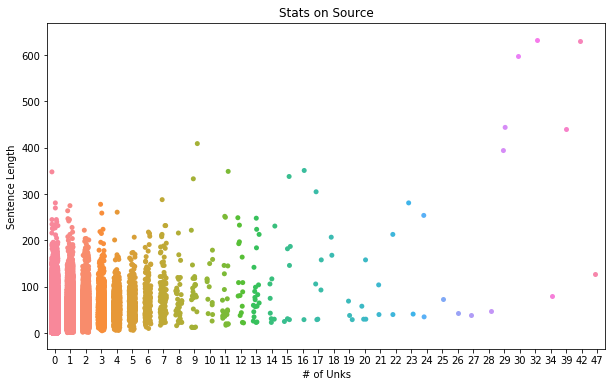

In [90]:
plt.figure(figsize=(10,6))
df=pd.DataFrame(stat_src, columns=['length','unk'])
sns.stripplot(data=df, x='unk', y='length',jitter=0.2)
plt.ylabel('Sentence Length')
plt.xlabel('# of Unks')
plt.title('Stats on Source')

In [86]:
# number of unknown and sentence length in target 
stat_trg = []
for pair in dev:
    length = len(pair.trg)
    unk = sum([1 if TRG.vocab.stoi[word]==0 else 0 for word in pair.trg])
    stat_trg.append((length, unk))

In [87]:
# Debug
for i in range(5):
    print(dev[i].trg)
    print(stat_trg[i])
    print(f'Unks: {list(filter(lambda x: TRG.vocab.stoi[x]==0, dev[i].trg))}\n')

['i', 'would', 'like', 'to', 'thank', 'the', 'rapporteur', 'for', 'her', 'conscientious', 'work', '.']
(12, 0)
Unks: []

['this', 'is', 'why', 'we', 'need', 'to', 'clearly', 'affirm', 'the', 'principle', 'that', 'the', 'service', 'should', 'be', 'free', '.']
(17, 0)
Unks: []

['the', 'instruments', 'for', 'achieving', 'this', 'objective', 'include', 'a', 'suitable', 'energy', 'mix', ',', 'an', 'adequate', 'level', 'of', 'production', 'capacity', ',', 'a', 'balance', 'between', 'supply', 'and', 'demand', ',', 'reductions', 'in', 'the', 'energy', 'intensity', 'of', 'the', 'economy', 'and', 'so', 'on', '.']
(38, 0)
Unks: []

['i', 'should', 'just', 'like', 'to', 'refer', 'back', ',', 'briefly', ',', 'to', 'three', 'points', 'which', 'i', 'believe', 'are', 'essential', '.']
(19, 0)
Unks: []

['the', 'report', 'that', 'we', 'have', 'adopted', 'seems', 'to', 'me', 'to', 'be', 'moving', 'in', 'this', 'direction', '.']
(16, 0)
Unks: []



Text(0.5, 1.0, 'Stats on Source')

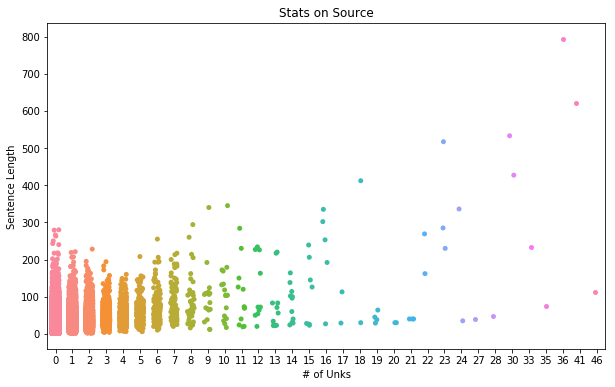

In [89]:
plt.figure(figsize=(10,6))
df=pd.DataFrame(stat_trg, columns=['length','unk'])
sns.stripplot(data=df, x='unk', y='length',jitter=0.2)
plt.ylabel('Sentence Length')
plt.xlabel('# of Unks')
plt.title('Stats on Source')